# Table of Contents

- [Imports](#Imports)
- [Data Read in and Cleaning](#Data-Read-in-and-Cleaning)
- [Questions throughout the Years](#Questions-throughout-the-Years)
- [Cleaning 2017 and 2019](#Cleaning-2017-and-2019)
- [Creating Car Risk Score](#Creating-Car-Risk-Score)
- [Making Final Datasets](#Making-Final-Datasets)
- [Quick EDA on Q's](#Quick-EDA-on-Q's)

This code looks into the data a bit from [YRBS National Survey](https://www.cdc.gov/healthyyouth/data/yrbs/pdf/2019/2019_YRBS_SADC_Documentation.pdf). 

## Imports
[back to top](#Table-of-Contents)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Read in and Cleaning
[back to top](#Table-of-Contents)

In [2]:
root = "../data/"
survDat = pd.concat([pd.read_csv(root + "cleanSurvBefore10s.csv"),
                     pd.read_csv(root + "cleanSurv10s.csv")],
                     ignore_index=True)

In [101]:
# Run if wanting to run this Data Read and Cleaning
# Otherwise run the above
root = "../data/"
survDat = pd.concat([pd.read_csv(root + "SADCQFirst200k.csv"),
                     pd.read_csv(root + "SADCQMid200k.csv"),
                     pd.read_csv(root + "SADCQLast.csv")],
                    ignore_index=True)
survDat.head()

,sitecode,sitename,sitetype,sitetypenum,year,survyear,weight,stratum,PSU,record,...,qwenthungry,qmusclestrength,qsunscreenuse,qindoortanning,qsunburn,qconcentrating,qcurrentasthma,qwheresleep,qspeakenglish,qtransgender
0,NYI,"Borough of Manhattan, NY (NYI)",District,1,2007,9,3.7107,49,2,1776279,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NYI,"Borough of Manhattan, NY (NYI)",District,1,2007,9,7.3810,49,2,1776280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NYI,"Borough of Manhattan, NY (NYI)",District,1,2007,9,3.8955,49,2,1776281,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NYI,"Borough of Manhattan, NY (NYI)",District,1,2007,9,29.5199,14,2,1776282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NYI,"Borough of Manhattan, NY (NYI)",District,1,2007,9,29.5199,14,2,1776283,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
survDat.year.unique()

array([2007, 1991, 1993, 1995, 1997, 1999, 2001, 2003, 2005, 2009, 2011,
       2013, 2015, 2017, 2019])

In [37]:
survDat.groupby(["year"])["survyear"].nunique()
survDat = survDat.drop("survyear", axis=1)

In [38]:
if survDat["record"].nunique() == survDat.shape[0]:
    survDat = survDat.drop("record", axis=1)

In [40]:
survDat.columns

Index(['sitecode', 'sitename', 'sitetype', 'sitetypenum', 'year', 'weight',
       'stratum', 'PSU', 'age', 'sex',
       ...
       'qwenthungry', 'qmusclestrength', 'qsunscreenuse', 'qindoortanning',
       'qsunburn', 'qconcentrating', 'qcurrentasthma', 'qwheresleep',
       'qspeakenglish', 'qtransgender'],
      dtype='object', length=149)

**Note**: `weight`, `stratum`, and `PSU` are sample weights and other things to make analysis repersent the population. Using these may be beyond our ability, but it is good to note these are available. [This paper](http://www.stat.columbia.edu/~gelman/research/unpublished/modelweighting.pdf) or [this paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4357363/) may be of use if we do decide to use the weights. Also [here](https://www.cdc.gov/healthyyouth/data/yrbs/pdf/2019/2019_YRBS_analysis_software.pdf) is the YRBS documentation on the weights, and the variables are talked about on page 6 of [this documentation](https://www.cdc.gov/healthyyouth/data/yrbs/pdf/2019/2019_YRBS_SADC_Documentation.pdf).

In [46]:
# columns missing all data
survDat.loc[:,survDat.isna().all()].head()

,qdrivemarijuana,qcelldriving,qchokeself,qdietpop,qcoffeetea,qsugardrink,qfoodallergy,qconcentrating,qspeakenglish
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# dropping columns with all missing
survDat = survDat.drop(survDat.loc[:,survDat.isna().all()].columns, axis=1)

In [55]:
# columns with 90 percent of the data missing
survDat.loc[:, survDat.isna().sum().div(survDat.shape[0]) > .9]

,q39,q83,q85,qbullyweight,qbullygender,qtypealcohol2,qhowmarijuana,qcurrentopioid,qcurrentheroin,qcurrentmeth,...,qtaughtbc,qsportsdrink,qenergydrink,qwater,qfastfood,qwenthungry,qsunscreenuse,qindoortanning,qsunburn,qwheresleep
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504244,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504245,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504246,3.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504247,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# dropping columns with 90 percent of the data missing
survDat = survDat.drop(survDat.loc[:, survDat.isna().sum().div(survDat.shape[0]) > .9].columns, axis=1)
survDat.head()

,sitecode,sitename,sitetype,sitetypenum,year,weight,stratum,PSU,age,sex,...,qcigschool,qchewtobschool,qalcoholschool,qmarijuanaschool,qcurrentcocaine,qgenderexp,qtaughtHIV,qmusclestrength,qcurrentasthma,qtransgender
0,NYI,"Borough of Manhattan, NY (NYI)",District,1,2007,3.7107,49,2,5.0,1.0,...,1.0,NaN,1.0,1.0,NaN,NaN,2.0,NaN,NaN,NaN
1,NYI,"Borough of Manhattan, NY (NYI)",District,1,2007,7.3810,49,2,5.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NYI,"Borough of Manhattan, NY (NYI)",District,1,2007,3.8955,49,2,5.0,1.0,...,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN
3,NYI,"Borough of Manhattan, NY (NYI)",District,1,2007,29.5199,14,2,5.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,NYI,"Borough of Manhattan, NY (NYI)",District,1,2007,29.5199,14,2,5.0,1.0,...,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN


In [73]:
# These are the categories of the questions
carRiskqs = ["q8", "q9", "q10", "q11"]
violenceqs = ["q12", "q13", "q14", "q15",
              "q16", "q17", "q18"]
sexqs = ["q19", "q20", "q21", "q22", "q58", "q59",
         "q60", "q61", "q62", 
         "q63", "q64", "qtaughtHIV"]
bullyqs = ["q23", "q24", "qbullygay"]
suicideqs = ["q25", "q26", "q27", 
             "q28", "q29"]
drugqs = ["q30", "q32", "q33",
          "q38", "q40", "q41",
          "q45", "q46", "q47",
          "q50", "q51", "q52",
          "q53", "q54", "q55",
          "q56", "q57", "qcigschool",
          "qalcoholschool", "qmarijuanaschool",
          'q31', 'q34', 'q35',
          'q36', 'q37', 'q42', 
          'q43', 'q44', 'q48',
          'q49', "qchewtobschool",
          "qcurrentcocaine"]
selfqs = ["q65", "q66", "q67",
          "q68", "q89", "qnowt",
          "qnobese", "bmipct", "bmi",
          "sexpart", "sexpart2", "sexid",
          "sexid2", "stheight", "stweight",
          "race4", "race7", "sex",
          "age", "grade", "qgenderexp",
          "qmusclestrength", "qcurrentasthma",
          "qtransgender"] 
selfHealthqs = ["q69", "q70", "q71",
                "q72", "q73", "q74",
                "q76", "q79", "q81",
                "q82", "q87", 'q75',
                'q77', 'q78', 'q80',
                'q84', 'q86', 'q88'] # may want to move some of these to sexqs
riskqs = ["qbikehelmet", "qpropertydamage"]

In [74]:
# cols left over
survDat.drop(carRiskqs+violenceqs+sexqs+suicideqs+drugqs+selfqs+selfHealthqs+riskqs+bullyqs, axis=1).columns

Index(['sitecode', 'sitename', 'sitetype', 'sitetypenum', 'year', 'weight',
       'stratum', 'PSU'],
      dtype='object')

In [76]:
survDat = survDat.drop(['sitetype', 'sitetypenum'], axis=1)

/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

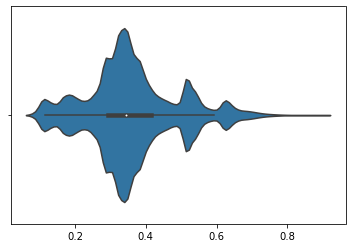

In [85]:
# plotting the distribution of percent missing columns for each person.
# we see there is a bump at .6, which is probably an early year that
# didnt have too many questions. So we will drop .65 and above.
sns.violinplot(survDat.isna().sum(axis=1).div(survDat.shape[1]))

In [91]:
survDat = survDat.drop(survDat.loc[survDat.isna().sum(axis=1).div(survDat.shape[1]) > .65, :].index)

In [100]:
# saving in two batchs because github needs individual files 
# to be less than 100 MB
survDat10s = survDat.query("year >= 2010")
survDatBefore10s = survDat.query("year < 2010")
survDat10s.to_csv(root + "cleanSurv10s.csv", index=False)
survDatBefore10s.to_csv(root + "cleanSurvBefore10s.csv", index=False)

## Questions throughout the Years
[Back to top](#Table-of-Contents)

In [3]:
# These are the categories of the questions
carRiskqs = ["q8", "q9", "q10", "q11"]
violenceqs = ["q12", "q13", "q14", "q15",
              "q16", "q17", "q18"]
sexqs = ["q19", "q20", "q21", "q22", "q58", "q59",
         "q60", "q61", "q62", 
         "q63", "q64", "qtaughtHIV"]
bullyqs = ["q23", "q24", "qbullygay"]
suicideqs = ["q25", "q26", "q27", 
             "q28", "q29"]
drugqs = ["q30", "q32", "q33",
          "q38", "q40", "q41",
          "q45", "q46", "q47",
          "q50", "q51", "q52",
          "q53", "q54", "q55",
          "q56", "q57", "qcigschool",
          "qalcoholschool", "qmarijuanaschool",
          'q31', 'q34', 'q35',
          'q36', 'q37', 'q42', 
          'q43', 'q44', 'q48',
          'q49', "qchewtobschool",
          "qcurrentcocaine"]
selfqs = ["q65", "q66", "q67",
          "q68", "q89", "qnowt",
          "qnobese", "bmipct", "bmi",
          "sexpart", "sexpart2", "sexid",
          "sexid2", "stheight", "stweight",
          "race4", "race7", "sex",
          "age", "grade", "qgenderexp",
          "qmusclestrength", "qcurrentasthma",
          "qtransgender"] 
selfHealthqs = ["q69", "q70", "q71",
                "q72", "q73", "q74",
                "q76", "q79", "q81",
                "q82", "q87", 'q75',
                'q77', 'q78', 'q80',
                'q84', 'q86', 'q88'] # may want to move some of these to sexqs
riskqs = ["qbikehelmet", "qpropertydamage"]

listOfQList = [carRiskqs, violenceqs, sexqs,
               suicideqs, drugqs, selfqs,
               selfHealthqs, riskqs, bullyqs]
listOfQListName = ["carRiskqs", "violenceqs", "sexqs",
                   "suicideqs", "drugqs", "selfqs",
                   "selfHealthqs", "riskqs", "bullyqs"]

In [8]:
survDat.loc[:,-survDat.isna().any()].head()

,sitecode,sitename,year,weight,stratum,PSU
0,NYI,"Borough of Manhattan, NY (NYI)",2007,3.7107,49,2
1,NYI,"Borough of Manhattan, NY (NYI)",2007,3.8955,49,2
2,NYI,"Borough of Manhattan, NY (NYI)",2007,29.5199,14,2
3,NYI,"Borough of Manhattan, NY (NYI)",2007,29.5199,14,2
4,NYI,"Borough of Manhattan, NY (NYI)",2007,29.5199,14,2


No questions have occurs all the time. So we will have to look into the proportions missing.

In [5]:
def getMissingForEachGroup(dat, colGroups, colGroupsNames): 
    propDataMissing = (dat.isna().sum() / dat.shape[0]).to_frame().T
    qCatAveMissing, qCatMedMissing = [], []
    
    for cols in colGroups:
        qCatAveMissing.append(propDataMissing[cols].T.mean()[0])
        qCatMedMissing.append(propDataMissing[cols].T.median()[0])
        
    qCatMissing = pd.DataFrame({"index" : colGroupsNames,
                                "Average" : qCatAveMissing,
                                "Median" : qCatMedMissing}).set_index("index")
    return qCatMissing
qCatMissing = getMissingForEachGroup(survDat, listOfQList, listOfQListName)
yearlyMissingQs = (survDat.groupby("year")
                          .apply(lambda dat : 
                                        getMissingForEachGroup(dat, listOfQList, 
                                                               listOfQListName)))

In [8]:
getMissingForEachGroup(survDat.query("year >= 2005"), listOfQList, listOfQListName).sort_values("Average", ascending=False)

,Average,Median
index,,
riskqs,0.556046,0.556046
carRiskqs,0.489258,0.510120
bullyqs,0.484995,0.370874
drugqs,0.409966,0.328736
selfHealthqs,0.343561,0.366568
sexqs,0.308939,0.175617
selfqs,0.283071,0.213581
violenceqs,0.186646,0.058688
suicideqs,0.158721,0.168038


In [28]:
qCatMissing.sort_values("Average", ascending=False)

,Average,Median
index,,
bullyqs,0.613393,0.527725
carRiskqs,0.495218,0.513632
riskqs,0.463024,0.463024
selfHealthqs,0.428773,0.414319
drugqs,0.415070,0.357322
selfqs,0.339836,0.197403
sexqs,0.320091,0.153862
violenceqs,0.188852,0.049656
suicideqs,0.155993,0.159730


In [29]:
qCatMissing.sort_values("Median", ascending=False)

,Average,Median
index,,
bullyqs,0.613393,0.527725
carRiskqs,0.495218,0.513632
riskqs,0.463024,0.463024
selfHealthqs,0.428773,0.414319
drugqs,0.415070,0.357322
selfqs,0.339836,0.197403
suicideqs,0.155993,0.159730
sexqs,0.320091,0.153862
violenceqs,0.188852,0.049656


In [44]:
yearlyMissingQs.loc[1991:2000,]

Average    Median
year index                           
1991 carRiskqs     0.501551  0.501924
     violenceqs    0.718807  1.000000
     sexqs         0.336571  0.007695
     suicideqs     0.228398  0.038476
     drugqs        0.665016  1.000000
     selfqs        0.668844  1.000000
     selfHealthqs  0.948533  1.000000
     riskqs        0.513901  0.513901
     bullyqs       1.000000  1.000000
1993 carRiskqs     0.544710  0.588260
     violenceqs    0.155602  0.021308
     sexqs         0.374596  0.052027
     suicideqs     0.245751  0.107039
     drugqs        0.568667  1.000000
     selfqs        0.684313  1.000000
     selfHealthqs  0.955099  1.000000
     riskqs        0.015256  0.015256
     bullyqs       1.000000  1.000000
1995 carRiskqs     0.528782  0.556193
     violenceqs    0.168333  0.013959
     sexqs         0.370024  0.054237
     suicideqs     0.246207  0.111800
     drugqs        0.473742  0.121486
     selfqs        0.679122  1.000000
     selfHealthqs  0.951496  1.000000
     riskqs        0.071685  0.071685
     bullyqs       1.000000  1.000000
1997 carRiskqs     0.501654  0.501780
     violenceqs    0.153233  0.015849
     sexqs         0.372966  0.061562
     suicideqs     0.248660  0.116394
     drugqs        0.450456  0.051774
     selfqs        0.671454  1.000000
     selfHealthqs  0.945822  1.000000
     riskqs        0.019269  0.019269
     bullyqs       1.000000  1.000000
1999 carRiskqs     0.528075  0.553507
     violenceqs    0.168571  0.016735
     sexqs         0.370363  0.062158
     suicideqs     0.062938  0.021957
     drugqs        0.408637  0.110978
     selfqs        0.408567  0.082793
     selfHealthqs  0.502828  0.153916
     riskqs        0.503209  0.503209
     bullyqs       1.000000  1.000000

In [46]:
yearlyMissingQs.loc[2000:2010,]

Average    Median
year index                           
2001 carRiskqs     0.502741  0.503646
     violenceqs    0.155747  0.018759
     sexqs         0.351266  0.156220
     suicideqs     0.063780  0.007737
     drugqs        0.368698  0.064208
     selfqs        0.364255  0.074589
     selfHealthqs  0.469914  0.101141
     riskqs        0.414166  0.414166
     bullyqs       1.000000  1.000000
2003 carRiskqs     0.502761  0.503409
     violenceqs    0.155580  0.018961
     sexqs         0.327339  0.106894
     suicideqs     0.083070  0.045446
     drugqs        0.342383  0.056476
     selfqs        0.381664  0.085651
     selfHealthqs  0.477780  0.097738
     riskqs        0.035289  0.035289
     bullyqs       1.000000  1.000000
2005 carRiskqs     0.503156  0.503334
     violenceqs    0.157156  0.019800
     sexqs         0.337863  0.118076
     suicideqs     0.082403  0.012549
     drugqs        0.373294  0.104183
     selfqs        0.351905  0.079224
     selfHealthqs  0.473731  0.195601
     riskqs        0.020966  0.020966
     bullyqs       1.000000  1.000000
2007 carRiskqs     0.611358  0.720851
     violenceqs    0.155788  0.020610
     sexqs         0.333020  0.116915
     suicideqs     0.083423  0.013274
     drugqs        0.352164  0.094661
     selfqs        0.334594  0.090171
     selfHealthqs  0.382823  0.158222
     riskqs        0.030867  0.030867
     bullyqs       1.000000  1.000000
2009 carRiskqs     0.617332  0.731287
     violenceqs    0.160897  0.030261
     sexqs         0.388271  0.161480
     suicideqs     0.177226  0.175691
     drugqs        0.408865  0.167256
     selfqs        0.327858  0.099978
     selfHealthqs  0.392593  0.355570
     riskqs        0.543753  0.543753
     bullyqs       0.693717  1.000000

In [47]:
yearlyMissingQs.loc[2010:,]

Average    Median
year index                           
2011 carRiskqs     0.734392  0.743616
     violenceqs    0.232353  0.058544
     sexqs         0.376797  0.151000
     suicideqs     0.174698  0.176614
     drugqs        0.468010  0.504900
     selfqs        0.287584  0.090191
     selfHealthqs  0.403335  0.339770
     riskqs        0.541909  0.541909
     bullyqs       0.331503  0.074518
2013 carRiskqs     0.399049  0.449642
     violenceqs    0.235306  0.070548
     sexqs         0.276930  0.155791
     suicideqs     0.158707  0.160392
     drugqs        0.495138  0.444760
     selfqs        0.261699  0.091467
     selfHealthqs  0.320276  0.194960
     riskqs        0.582537  0.582537
     bullyqs       0.256314  0.013154
2015 carRiskqs     0.240570  0.244337
     violenceqs    0.239282  0.063925
     sexqs         0.290269  0.178671
     suicideqs     0.188613  0.141852
     drugqs        0.462214  0.430057
     selfqs        0.268313  0.110695
     selfHealthqs  0.259514  0.174371
     riskqs        0.553606  0.553606
     bullyqs       0.239437  0.017462
2017 carRiskqs     0.384236  0.458303
     violenceqs    0.138963  0.078256
     sexqs         0.287148  0.232655
     suicideqs     0.203128  0.171176
     drugqs        0.374036  0.292134
     selfqs        0.231690  0.118389
     selfHealthqs  0.262895  0.176365
     riskqs        0.956069  0.956069
     bullyqs       0.252173  0.025550
2019 carRiskqs     0.405456  0.413665
     violenceqs    0.177425  0.128114
     sexqs         0.196496  0.208796
     suicideqs     0.175053  0.174036
     drugqs        0.354355  0.219338
     selfqs        0.225195  0.116467
     selfHealthqs  0.277749  0.199854
     riskqs        0.971458  0.971458
     bullyqs       0.259559  0.020741

In [9]:
survDat.query("year >= 2005").loc[:,["year"]+carRiskqs].groupby("year").apply(lambda y : y.isna().sum() / y.shape[0])

,year,q8,q9,q10,q11
year,,,,,
2005,0.0,0.006668,0.005958,1.000000,1.000000
2007,0.0,0.003730,0.441702,1.000000,1.000000
2009,0.0,0.006756,0.462573,1.000000,1.000000
2011,0.0,0.487233,0.450335,1.000000,1.000000
2013,0.0,0.470656,0.428629,0.096033,0.600880
2015,0.0,0.389447,0.390300,0.099228,0.083306
2017,0.0,0.471017,0.445589,0.508429,0.111910
2019,0.0,0.436788,0.357705,0.420198,0.407132


In [10]:
survDat.query("year >= 2005").loc[:,["year"]+carRiskqs].groupby("year").apply(lambda y : y.shape[0])

year
2005    39445
2007    40756
2009    50031
2011    49894
2013    42496
2015    42206
2017    49236
2019    55638
dtype: int64

# Cleaning 2017 and 2019
[Back to top](#Table-of-Contents)

In [4]:
def cleanYear(survDat, year, thresh=.9):
    carRiskqs = ["q8", "q9", "q10", "q11"]
    if year <= 2011:
        carRiskqs = ["q8", "q9"]
    surv = survDat.query("year == @year")
    numRows = surv.shape[0]
    numCols = surv.shape[1]
    
    survNoCarNAs = surv.dropna(subset=carRiskqs)
    numRowsNoCarNAs = survNoCarNAs.shape[0]
    
    surv = survNoCarNAs.dropna(axis=1, thresh=int(numRowsNoCarNAs*thresh))
    surv = surv.dropna()
    
    return surv

In [5]:
surv17 = survDat.query("year == 2017")
surv19 = survDat.query("year == 2019")
print("2017 Shape:", surv17.shape, "2019 Shape:", surv19.shape)

2017 Shape: (49236, 113) 2019 Shape: (55638, 113)


In [6]:
numRows17 = surv17.shape[0]
numRows19 = surv19.shape[0]
numCols = surv19.shape[1]

In [7]:
surv17NoCarNAs = surv17.dropna(subset=carRiskqs)
numRows17NoCarNAs = surv17NoCarNAs.shape[0]
surv17NoCarNAs.shape

(20523, 113)

In [8]:
colThresh = [.6, .7, .8, .9]

for thresh in colThresh:
    temp = surv17NoCarNAs.dropna(axis=1, thresh=int(numRows17NoCarNAs*thresh))
    print(thresh, temp.dropna().shape)

0.6 (3500, 100)
0.7 (3568, 91)
0.8 (4184, 86)
0.9 (12121, 52)


In [9]:
colThresh = [i / 100 for i in range(80, 100, 1)]

for thresh in colThresh:
    temp = surv17NoCarNAs.dropna(axis=1, thresh=int(numRows17NoCarNAs*thresh))
    print(thresh, temp.dropna().shape)

0.8 (4184, 86)
0.81 (4231, 82)
0.82 (4272, 80)
0.83 (5853, 76)
0.84 (5877, 74)
0.85 (6183, 69)
0.86 (6221, 66)
0.87 (7033, 62)
0.88 (8402, 59)
0.89 (10134, 56)
0.9 (12121, 52)
0.91 (12355, 46)
0.92 (14212, 39)
0.93 (15148, 37)
0.94 (15785, 34)
0.95 (16712, 32)
0.96 (16712, 32)
0.97 (18183, 22)
0.98 (19381, 18)
0.99 (20077, 14)


In [10]:
surv17 = surv17NoCarNAs.dropna(axis=1, thresh=int(numRows17NoCarNAs*.9))
surv17 = surv17.dropna()
surv17.shape

(12121, 52)

In [16]:
surv19NoCarNAs = surv19.dropna(subset=carRiskqs)
numRows19NoCarNAs = surv19NoCarNAs.shape[0]
surv19NoCarNAs.shape

(27613, 113)

In [17]:
colThresh = [.6, .7, .8, .9]

for thresh in colThresh:
    temp = surv19NoCarNAs.dropna(axis=1, thresh=int(numRows19NoCarNAs*thresh))
    print(thresh, temp.dropna().shape)

0.6 (4560, 100)
0.7 (5041, 95)
0.8 (5214, 81)
0.9 (14022, 51)


In [18]:
colThresh = [i / 100 for i in range(80, 100, 1)]

for thresh in colThresh:
    temp = surv19NoCarNAs.dropna(axis=1, thresh=int(numRows19NoCarNAs*thresh))
    print(thresh, temp.dropna().shape)

0.8 (5214, 81)
0.81 (5218, 80)
0.82 (5224, 79)
0.83 (6257, 76)
0.84 (6291, 73)
0.85 (7043, 71)
0.86 (8892, 67)
0.87 (10807, 60)
0.88 (10814, 59)
0.89 (10893, 57)
0.9 (14022, 51)
0.91 (14462, 48)
0.92 (16053, 41)
0.93 (18788, 38)
0.94 (19709, 30)
0.95 (21171, 27)
0.96 (24675, 22)
0.97 (24675, 22)
0.98 (26600, 16)
0.99 (27029, 14)


In [19]:
surv19 = surv19NoCarNAs.dropna(axis=1, thresh=int(numRows19NoCarNAs*.9))
surv19 = surv19.dropna()
surv19.shape

(14022, 51)

In [20]:
inBoth = np.intersect1d(surv19.columns.to_numpy(), surv17.columns.to_numpy())
inBoth.shape

(43,)

In [21]:
[col for col in surv19.columns.to_numpy() if col not in inBoth]

['q65', 'sexpart', 'sexpart2', 'q15', 'q17', 'q27', 'q41', 'qtaughtHIV']

In [22]:
[col for col in surv17.columns.to_numpy() if col not in inBoth]

['q16', 'q21', 'q51', 'q52', 'q53', 'q54', 'q67', 'q68', 'q69']

# Creating Car Risk Score
[Back to top](#Table-of-Contents)

In [93]:
surv17[carRiskqs].apply(lambda col : np.sort(col.unique()))

q8                    [1.0, 2.0, 3.0, 4.0, 5.0]
q9                    [1.0, 2.0, 3.0, 4.0, 5.0]
q10              [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
q11    [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
dtype: object

All scores will be given a value 0 to 10. With 10 being the most risky, and 0 being not risky at all. The spacing and max for an individual question depends on how extreme the question is and the options extreme.

Q8. How often do you wear a seat belt when riding in a car driven by someone else?
- A. Never : `Score = 8`
- B. Rarely : `Score = 5`
- C. Sometimes : `Score = 3`
- D. Most of the time : `Score = 1`
- E. Always : `Score = 0`

In [115]:
q8Scores = {1.0 : 8, 2.0 : 5, 3.0 : 3, 4.0 : 1, 5.0 : 0}

Q9. During the past 30 days, how many times did you ride in a car or other vehicle driven by someone who had
been drinking alcohol?
- A. 0 times : `Score = 0`
- B. 1 time : `Score = 3`
- C. 2 or 3 times : `Score = 5`
- D. 4 or 5 times : `Score = 7`
- E. 6 or more times : `Score = 10`

In [116]:
q9Scores = {1.0 : 0, 2.0 : 3, 3.0 : 5, 4.0 : 7, 5.0 : 10}

Q10. During the past 30 days, how many times did you drive a car or other vehicle when you had been drinking
alcohol?
- A. I did not drive a car or other vehicle during the past 30 days : `Score = 0`
- B. 0 times : `Score = 0`
- C. 1 time : `Score = 4`
- D. 2 or 3 times : `Score = 6`
- E. 4 or 5 times : `Score = 8`
- F. 6 or more times : `Score = 10`

In [117]:
q10Scores = {1.0 : 0, 2.0 : 0, 3.0 : 4, 4.0 : 6, 5.0 : 8, 6.0 : 10}

Q11. During the past 30 days, on how many days did you text or e-mail while driving a car or other vehicle?
- A. I did not drive a car or other vehicle during the past 30 days : `Score = 0`
- B. 0 days : `Score = 0`
- C. 1 or 2 days : `Score = 2`
- D. 3 to 5 days : `Score = 3`
- E. 6 to 9 days : `Score = 5`
- F. 10 to 19 days : `Score = 7`
- G. 20 to 29 days : `Score = 8`
- H. All 30 days : `Score = 10`

In [118]:
q11Scores = {1.0 : 0, 2.0 : 0, 3.0 : 2, 4.0 : 3, 5.0 : 5, 6.0 : 7, 7.0 : 8, 8.0 : 10}

In [127]:
carRiskScores = {"q8" : q8Scores, "q9" : q9Scores, "q10" : q10Scores, "q11" : q11Scores}
saturatedScore = sum([max(carRiskScores[q].values()) for q in carRiskScores.keys()])
surv17[carRiskqs].apply(lambda col : col.replace(carRiskScores[col.name])).sum(axis=1).div(saturatedScore)

389481    0.657895
389484    0.131579
389490    0.000000
389492    0.263158
389493    0.078947
            ...   
436838    0.078947
436843    0.000000
436844    0.026316
436846    0.131579
436847    0.000000
Length: 12121, dtype: float64

In [78]:
def carRiskScore(dat):
    carRiskqs = ["q8", "q9", "q10", "q11"]
    q8Scores = {1.0 : 8, 2.0 : 5, 3.0 : 3, 4.0 : 1, 5.0 : 0}
    q9Scores = {1.0 : 0, 2.0 : 3, 3.0 : 5, 4.0 : 7, 5.0 : 10}
    q10Scores = {1.0 : 0, 2.0 : 0, 3.0 : 4, 4.0 : 6, 5.0 : 8, 6.0 : 10}
    q11Scores = {1.0 : 0, 2.0 : 0, 3.0 : 2, 4.0 : 3, 5.0 : 5, 6.0 : 7, 7.0 : 8, 8.0 : 10}
    carRiskScores = {"q8" : q8Scores, "q9" : q9Scores, "q10" : q10Scores, "q11" : q11Scores}
    saturatedScore = sum([max(carRiskScores[q].values()) for q in carRiskScores.keys()])
    
    return 1000*(dat[carRiskqs].apply(lambda col : col.replace(carRiskScores[col.name]))
                               .sum(axis=1)
                               .div(saturatedScore))

In [79]:
carRiskScore(surv17).describe()

count    12121.000000
mean        66.530901
std        106.450827
min          0.000000
25%          0.000000
50%         26.315789
75%         78.947368
max       1000.000000
dtype: float64

In [80]:
carRiskScore(surv19).describe()

count    14022.000000
mean        70.468212
std        109.068784
min          0.000000
25%          0.000000
50%         26.315789
75%         78.947368
max       1000.000000
dtype: float64

In [81]:
surv19["carRiskScore"] = carRiskScore(surv19)
surv17["carRiskScore"] = carRiskScore(surv17)

<AxesSubplot:xlabel='carRiskScore', ylabel='sitename'>

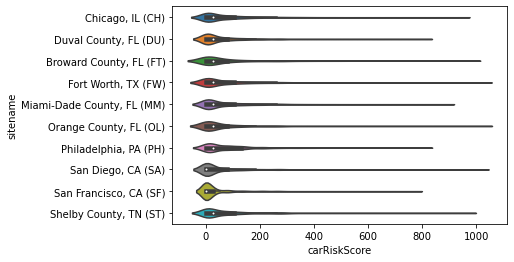

In [82]:
sns.violinplot(y="sitename", x="carRiskScore", data = surv17)

<AxesSubplot:xlabel='carRiskScore', ylabel='sitename'>

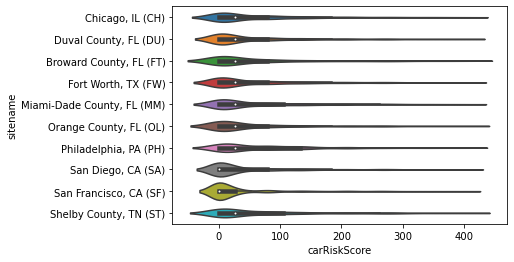

In [89]:
carRisk98th = surv17["carRiskScore"].quantile(.98)
sns.violinplot(y="sitename", x="carRiskScore", data = surv17.query("carRiskScore <= @carRisk98th"))

<AxesSubplot:xlabel='carRiskScore', ylabel='sitename'>

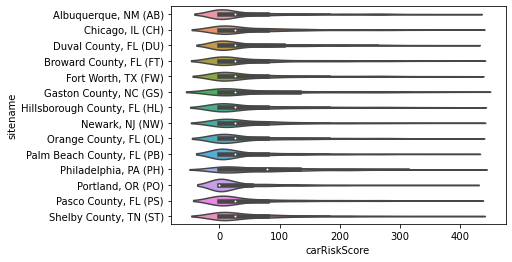

In [90]:
carRisk98th = surv19["carRiskScore"].quantile(.98)
sns.violinplot(y="sitename", x="carRiskScore", data = surv19.query("carRiskScore <= @carRisk98th"))

#sns.violinplot(y="sitename", x="carRiskScore", data = surv19)

<AxesSubplot:>

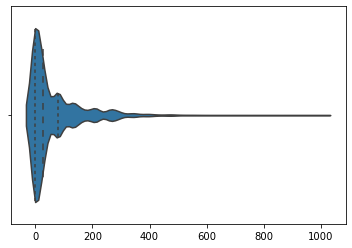

In [152]:
sns.violinplot(x=carRiskScore(surv17), inner="quartile")

<AxesSubplot:>

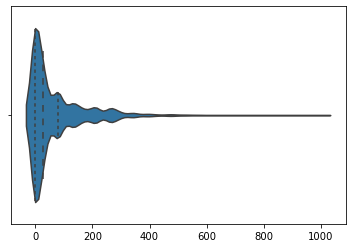

In [153]:
sns.violinplot(x=carRiskScore(surv19),inner="quartile")

# Making Final Datasets
[back to top](#Table-of-Contents)

In [3]:
def cleanYear(survDat, year, thresh=.9):
    carRiskqs = ["q8", "q9", "q10", "q11"]
    if year <= 2011:
        carRiskqs = ["q8", "q9"]
    surv = survDat.query("year == @year")
    numRows = surv.shape[0]
    numCols = surv.shape[1]
    
    survNoCarNAs = surv.dropna(subset=carRiskqs)
    numRowsNoCarNAs = survNoCarNAs.shape[0]
    
    surv = survNoCarNAs.dropna(axis=1, thresh=int(numRowsNoCarNAs*thresh))
    surv = surv.dropna()
    
    return surv

In [4]:
surv05 = cleanYear(survDat, 2005)
surv07 = cleanYear(survDat, 2007)
surv09 = cleanYear(survDat, 2009)
surv11 = cleanYear(survDat, 2011)
surv13 = cleanYear(survDat, 2013)
surv15 = cleanYear(survDat, 2015)
surv17 = cleanYear(survDat, 2017)
surv19 = cleanYear(survDat, 2019)
cleanSurvAll = [surv05, surv07, surv09,
                surv11, surv13, surv15,
                surv17, surv19]

In [5]:
# this code finds what columns are in surv1 that 
# do not appear in surv2 (where surv2 is all the other years)
diffDict = {}

for surv1 in cleanSurvAll:
    year1 = surv1["year"].iloc[0]
    diffDict[year1] = {}
    for surv2 in cleanSurvAll:
        year2 = surv2["year"].iloc[0]
        inBoth = np.intersect1d(surv1.columns.to_numpy(),
                                surv2.columns.to_numpy())
        diffDict[year1][year2] = [col for col in surv1.columns.to_numpy()
                                      if col not in inBoth]
    total = []
    for val in diffDict[year1].values():
        total += val
    diffDict[year1] = set(total)
    surv1 = surv1.drop(set(total), axis=1)

In [19]:
sameColSurvAll = []

for surv in cleanSurvAll:
    year = surv["year"].iloc[0]
    dropCols = diffDict[year]
    if year > 2011:
        try:
            dropCols.remove("q10")
        except:
            pass
        try:
            dropCols.remove("q11")
        except:
            pass
    sameColSurvAll.append(surv.drop(dropCols, axis=1))  

In [36]:
survCleanWithSameCols = pd.concat(sameColSurvAll)
#survCleanWithSameCols.to_csv(root+"survCleanWithSameCols.csv")
survCleanWithSameCols.shape

(108151, 27)

In [41]:
def carRiskScore(dat, year):
    carRiskqs = ["q8", "q9", "q10", "q11"]
    if year <= 2011:
        carRiskqs = ["q8", "q9"]
    q8Scores = {1.0 : 8, 2.0 : 5, 3.0 : 3, 4.0 : 1, 5.0 : 0}
    q9Scores = {1.0 : 0, 2.0 : 3, 3.0 : 5, 4.0 : 7, 5.0 : 10}
    q10Scores = {1.0 : 0, 2.0 : 0, 3.0 : 4, 4.0 : 6, 5.0 : 8, 6.0 : 10}
    q11Scores = {1.0 : 0, 2.0 : 0, 3.0 : 2, 4.0 : 3, 5.0 : 5, 6.0 : 7, 7.0 : 8, 8.0 : 10}
    carRiskScores = {"q8" : q8Scores, "q9" : q9Scores, "q10" : q10Scores, "q11" : q11Scores}
    saturatedScore = sum([max(carRiskScores[q].values()) for q in carRiskScores.keys()])
    
    return 1000*(dat[carRiskqs].apply(lambda col : col.replace(carRiskScores[col.name]))
                               .sum(axis=1)
                               .div(saturatedScore))

def addCarRisk(yearDat):
    try:
        yearDat.insert(0, "carRiskScore",
                       carRiskScore(yearDat,
                                    yearDat.year.iloc[0]))
    except:
        yearDat["carRiskScore"] = carRiskScore(yearDat,
                                               yearDat.year.iloc[0])
    return yearDat

In [45]:
#(survCleanWithSameCols.groupby("year")
#                      .apply(lambda yearDat : addCarRisk(yearDat))
#                      .drop(["stratum", "PSU", 
#                             "weight", "sitename", 
#                             "bmipct", "q8", "q9",
#                             "q10", "q11"], axis=1)
#                      .to_csv(root+"survCleanWithSameCols.csv"))

In [46]:
allQsMissing = []

for val in diffDict.values():
    allQsMissing += [v for v in val]

unique, counts = np.unique(np.asarray(allQsMissing),
                           return_counts=True)

numYearsShowUp = pd.DataFrame(np.concatenate([[unique], [counts]], axis=0).T)
numYearsShowUp.columns = ["question", "NumYearsIn"]
numYearsShowUp = numYearsShowUp.astype({'NumYearsIn': 'int32'})
qsInstrested = (numYearsShowUp.sort_values("NumYearsIn", ascending=False)
                              .query("NumYearsIn >= 5")
                              .question)
qsInWhatYears = {}
for q in qsInstrested:
    qsInWhatYears[q] = []
    for key in diffDict.keys():
        if q in diffDict[key]:
            qsInWhatYears[q].append(key)
qsInWhatYears

{'q16': [2005, 2007, 2009, 2011, 2013, 2015, 2017],
 'q17': [2005, 2007, 2009, 2011, 2013, 2015, 2019],
 'q70': [2007, 2009, 2011, 2013, 2015, 2017, 2019],
 'q68': [2005, 2007, 2009, 2011, 2013, 2015, 2017],
 'q67': [2005, 2007, 2009, 2011, 2013, 2015, 2017],
 'q15': [2005, 2007, 2009, 2011, 2013, 2015, 2019],
 'q50': [2005, 2007, 2009, 2011, 2013, 2017, 2019],
 'q12': [2005, 2007, 2009, 2011, 2013, 2015],
 'q19': [2007, 2009, 2011, 2015, 2017, 2019],
 'q69': [2007, 2009, 2011, 2013, 2015, 2017],
 'q27': [2005, 2007, 2009, 2011, 2013, 2019],
 'q32': [2005, 2007, 2009, 2011, 2013, 2015],
 'q53': [2005, 2007, 2009, 2011, 2013, 2017],
 'q46': [2005, 2007, 2009, 2011, 2013, 2015],
 'q45': [2005, 2007, 2009, 2011, 2013],
 'q51': [2005, 2009, 2011, 2013, 2017],
 'q79': [2005, 2007, 2009, 2011, 2013],
 'q40': [2007, 2009, 2011, 2013, 2015],
 'q23': [2011, 2013, 2015, 2017, 2019]}

In [47]:
questionsToUse = []
for q in qsInWhatYears.keys():
    if ((2015 in qsInWhatYears[q]) 
        or (2017 in qsInWhatYears[q]) 
        or (2019 in qsInWhatYears[q])):
        questionsToUse.append(q)

In [48]:
cols = np.concatenate([survCleanWithSameCols.columns.to_numpy(),
                       questionsToUse])

In [49]:
cols

array(['sitecode', 'sitename', 'year', 'weight', 'stratum', 'PSU', 'age',
       'sex', 'grade', 'race4', 'race7', 'stheight', 'stweight', 'bmi',
       'bmipct', 'qnobese', 'qnowt', 'q8', 'q9', 'q13', 'q18', 'q25',
       'q26', 'q47', 'q57', 'q10', 'q11', 'q16', 'q17', 'q70', 'q68',
       'q67', 'q15', 'q50', 'q12', 'q19', 'q69', 'q27', 'q32', 'q53',
       'q46', 'q51', 'q40', 'q23'], dtype=object)

In [90]:
#survDat.groupby("sitecode").apply(lambda x : x["sitename"].iloc[0]).to_frame().to_csv("sitecodeToSitename.csv")

In [53]:
peopleInt = survCleanWithSameCols.index

In [56]:
#(survDat[cols].loc[peopleInt, :]
#              .groupby("year")
#              .apply(lambda yearDat : addCarRisk(yearDat))
#              .drop(["stratum", "PSU", 
#                     "weight", "sitename", 
#                     "bmipct", "q8", "q9",
#                     "q10", "q11"], axis=1)
#              .to_csv("survCleanWithSomeNA.csv"))

# Quick EDA on Q's
[back to top](#Table-of-Contents)

In [95]:
survCleanWithSameCols.columns

Index(['age', 'bmi', 'bmipct', 'grade', 'q13', 'q18', 'q25', 'q26', 'q47',
       'q57', 'qnobese', 'qnowt', 'race4', 'race7', 'sex', 'stheight',
       'stweight', 'sitecode', 'year'],
      dtype='object')

<AxesSubplot:xlabel='q13', ylabel='sitecode'>

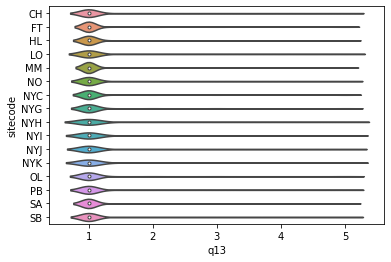

In [96]:
sns.violinplot(y="sitecode", x="q13", data = survCleanWithSameCols.query("year == 2005"))

<AxesSubplot:xlabel='q13', ylabel='sitecode'>

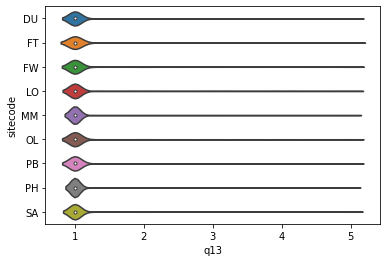

In [97]:
sns.violinplot(y="sitecode", x="q13", data = survCleanWithSameCols.query("year == 2015"))

<AxesSubplot:xlabel='q47', ylabel='sitecode'>

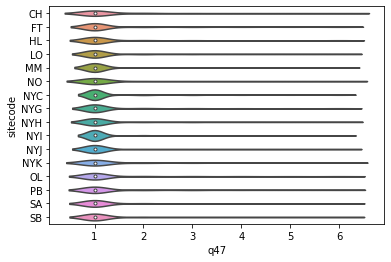

In [98]:
sns.violinplot(y="sitecode", x="q47", data = survCleanWithSameCols.query("year == 2005"))

<AxesSubplot:xlabel='q47', ylabel='sitecode'>

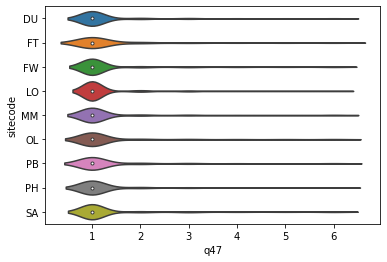

In [99]:
sns.violinplot(y="sitecode", x="q47", data = survCleanWithSameCols.query("year == 2015"))